## Argo status

For this example it is requires to have downloaded the full version of the Argo Global Data Assembly Centre (Argo GDAC) snapshot from july 2021 [DOI 10.17882/42182](https://www.seanoe.org/data/00311/42182/#86141)

Let's use, reproduce the figure of the status of the Argo network that is found on the AST web page:

In [20]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

from datetime import date, timedelta

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

The correspondence for the DATA_CENTRE code and the name is in the _Reference table 4: data centres and institutions codes of the [Argo user’s manual](https://archimer.ifremer.fr/doc/00187/29825/)_

and it is possible to get the WMO of all the platforms that measured during this month, together with its data acquisition center. Hence, we can download the netCDF files for each cycle if necessary:

In [21]:
day=7
month=7
year=2021

In [22]:
status_date = date(year,month,day)

In [23]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
TEMPs=np.array([])
PSALs=np.array([])
PROJECT_NAMEs=np.array([])

In [24]:
for basin in ['atlantic_ocean','pacific_ocean','indian_ocean']:
    for i in  range(0,30):
        day = status_date - timedelta(days=i)
        filein=f"../../Data/202107-ArgoData/geo/{basin}/{day.year:04d}/{day.month:02d}/{day.year:04d}{day.month:02d}{day.day:02d}_prof.nc"
        DS=xr.open_dataset(filein)

        DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
        PROJECT_NAMEs=np.append(PROJECT_NAMEs,DS.PROJECT_NAME.astype(str).values)
        WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)
        LONs=np.append(LONs,DS.LONGITUDE.values)
        LATs=np.append(LATs,DS.LATITUDE.values)
        

        tempi= np.zeros(DS.LONGITUDE.values.shape[0])
        tempi.fill(np.nan)

        psali= np.zeros(DS.LONGITUDE.values.shape[0])
        psali.fill(np.nan)

        for ip in range(0,DS.LONGITUDE.values.shape[0]):
            tempi[ip]=np.interp(10,DS.PRES[ip,:],DS.TEMP[ip,:])
            psali[ip]=np.interp(10,DS.PRES[ip,:],DS.PSAL[ip,:])
        
        TEMPs=np.append(TEMPs,tempi)
        PSALs=np.append(PSALs,psali)

In [25]:
#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]
PROJECT_NAMEs=PROJECT_NAMEs[indices]
TEMPs=TEMPs[indices]
PSALs=PSALs[indices]

In [26]:
DACs=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')


In [27]:
print(f"{WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],200):
    print(f"{ip} WMO {WMOs[ip]:07.0f} DAC {DACs[ip]}")

3772 Argo floats where active:
0 WMO 1901302 DAC bodc
200 WMO 1902062 DAC aoml
400 WMO 2902392 DAC aoml
600 WMO 3901043 DAC aoml
800 WMO 3901610 DAC coriolis
1000 WMO 3901975 DAC coriolis
1200 WMO 4902103 DAC aoml
1400 WMO 4902914 DAC aoml
1600 WMO 4903330 DAC aoml
1800 WMO 5902529 DAC aoml
2000 WMO 5904733 DAC aoml
2200 WMO 5905130 DAC aoml
2400 WMO 5905388 DAC csiro
2600 WMO 5905781 DAC aoml
2800 WMO 5906163 DAC aoml
3000 WMO 5906409 DAC aoml
3200 WMO 6902753 DAC coriolis
3400 WMO 6903046 DAC coriolis
3600 WMO 6904120 DAC coriolis


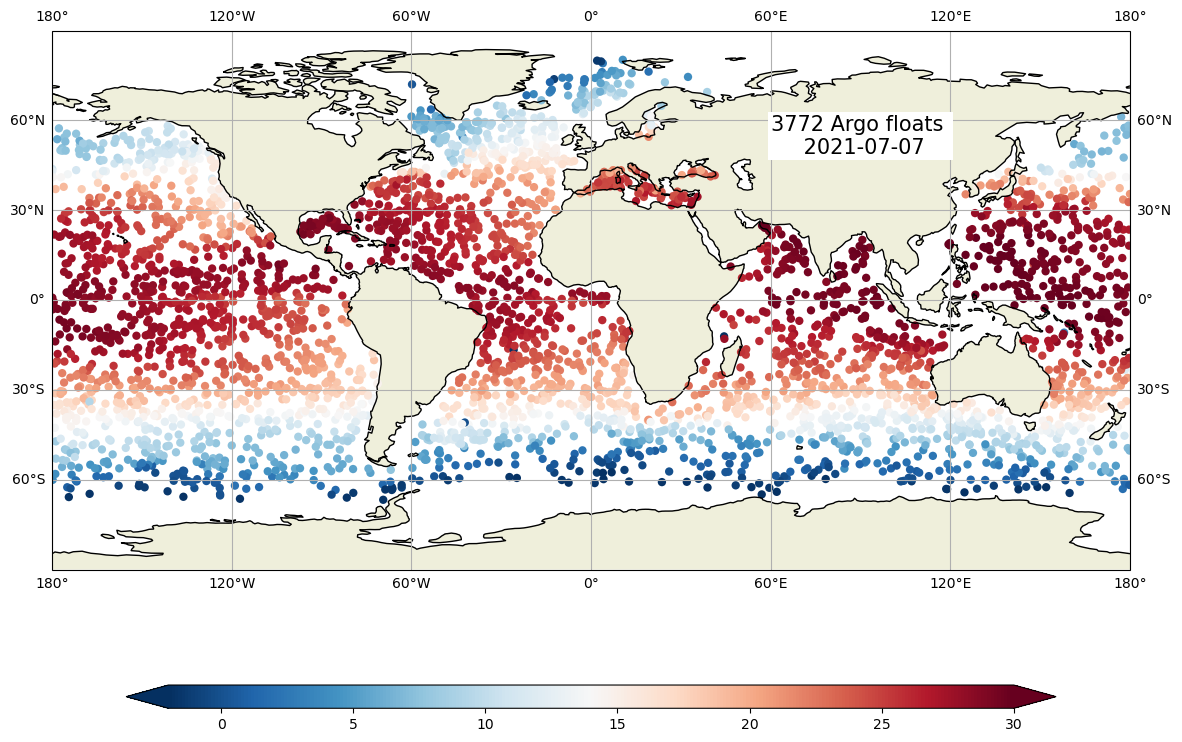

In [28]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global()
cs=ax.scatter(LONs,LATs,c=TEMPs,cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')

ax.text(90,62,f"{WMOs.shape[0]} Argo floats \n {status_date:%Y-%m-%d}",fontsize=15, horizontalalignment='center',
        verticalalignment='top',bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)

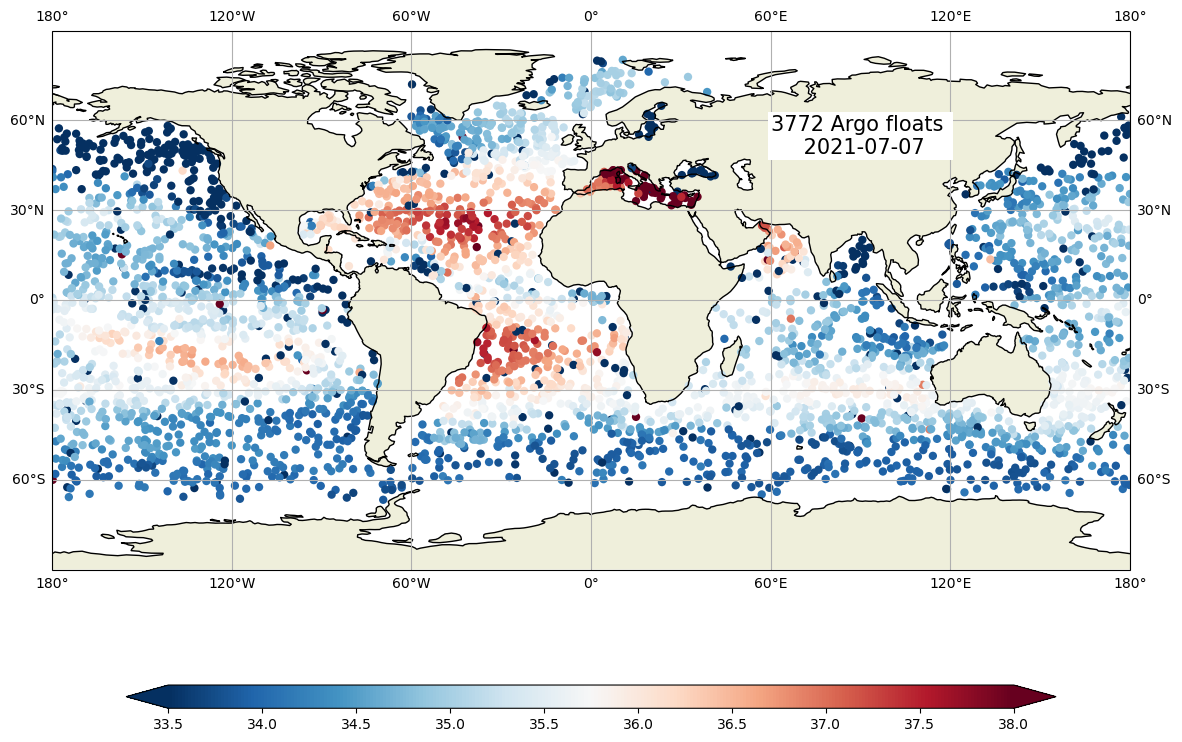

In [29]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global()
cs=ax.scatter(LONs,LATs,c=PSALs,cmap="RdBu_r",vmin=33.5, vmax=38, edgecolor='none')
ax.text(90,62,f"{WMOs.shape[0]} Argo floats \n {status_date:%Y-%m-%d}",fontsize=15, horizontalalignment='center',
        verticalalignment='top',bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)